In [49]:
#Capstone 2

#Modelling

In [51]:
#imports
import pandas as pd
import numpy as np
import datetime as dt

# Import regression modules
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import sklearn.model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import expon
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR



# Show plots inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
mpl.style.reload_library()
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [53]:
#Import the dataframe

new_df = pd.read_csv('/Users/ofrioren/GIT/Capstone II/data/new_df.csv')
new_df = new_df[['index', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]
new_df

,index,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Housing prices LA,254.000000,208.00,176.000000,174.000000,166.000000,165.000,180.000000,204.000000,216.000,232.000000,248.000000,265.000000,274.000000,281.000000,314.000000,363.000000,375.000000
1,Unemployment rate LA,5.100000,7.50,11.700000,12.600000,12.200000,11.000,9.800000,8.200000,6.700,5.300000,4.800000,4.700000,4.500000,12.400000,9.000000,5.000000,5.000000
2,Obama ACA Indicator,0.000000,0.00,0.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,"CPI California, Urban Consumers",217.000000,225.00,224.000000,227.000000,233.000000,238.000,242.000000,246.000000,250.000,255.000000,263.000000,273.000000,281.000000,285.000000,297.000000,319.000000,332.000000
4,"Healthcare Cost, California",209334.000000,220894.00,229415.000000,241845.000000,253703.000000,267048.000,277008.000000,288330.000000,311146.000,325931.000000,338088.000000,357648.000000,379715.000000,405451.000000,426104.673940,447810.446031,470621.910151
5,CA unemployment rate,5.308333,7.30,11.541667,12.458333,11.891667,10.525,9.033333,7.566667,6.225,5.516667,4.833333,4.258333,4.100000,10.191667,7.325000,4.275000,4.741667
6,CA Housing prices,608.285000,486.74,421.292500,408.630000,387.325000,388.390,435.887500,487.855000,522.490,559.445000,596.040000,634.745000,655.270000,683.090000,779.145000,900.000000,915.810000
7,Overall Homeless CA,138986.000000,181399.00,171521.000000,57468.000000,161548.000000,151278.000,129972.000000,131532.000000,118142.000,115738.000000,113952.000000,118552.000000,120098.000000,125128.000000,123480.000000,123678.000000,136531.000000
8,CA-500,9903.000000,10028.00,2301.000000,9605.000000,9706.000000,7254.000,7394.000000,6524.000000,6556.000,7567.000000,7631.000000,7053.000000,7067.000000,7086.000000,7086.000000,7202.000000,7202.000000
9,CA-501,7582.000000,7754.00,4000.000000,8124.000000,8035.000000,6857.000,6858.000000,6996.000000,6775.000,6408.000000,7008.000000,5895.000000,5669.000000,5823.000000,5823.000000,5171.000000,5703.000000


In [55]:
new_df.shape

(52, 18)

In [57]:
#In this section I separate the time-series data into train and test groups, discarding the columns with string data.

# Create a subset of the DataFrame with only numeric columns, excluding 'index' and the target year '2023'
preX = new_df.drop(['index', '2023'], axis=1)
X = preX.drop(index=preX.index[7]) 
y = new_df['2023']


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numeric columns
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back into a DataFrame to retain column names and indices
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# PCA dimension reduction 
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled_df)

# TimeSeriesSplit with 4 splits
tscv = TimeSeriesSplit(n_splits=4)

for train_index, test_index in tscv.split(X_pca):
    # Print the indices for clarity
    print("TRAIN indices:", train_index, "TEST indices:", test_index)

    # Using .iloc to avoid KeyError and ensure indexing works correctly
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Display the shapes of the training and test sets
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10] TEST indices: [11 12 13 14 15 16 17 18 19 20]
X_train shape: (11, 1), X_test shape: (10, 1)
y_train shape: (11,), y_test shape: (10,)
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] TEST indices: [21 22 23 24 25 26 27 28 29 30]
X_train shape: (21, 1), X_test shape: (10, 1)
y_train shape: (21,), y_test shape: (10,)
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST indices: [31 32 33 34 35 36 37 38 39 40]
X_train shape: (31, 1), X_test shape: (10, 1)
y_train shape: (31,), y_test shape: (10,)
TRAIN indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] TEST indices: [41 42 43 44 45 46 47 48 49 50]
X_train shape: (41, 1), X_test shape: (10, 1)
y_train shape: (41,), y_test shape: (10,)


In [59]:
X

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,254.000000,208.00,176.000000,174.000000,166.000000,165.000,180.000000,204.000000,216.000,232.000000,248.000000,265.000000,274.000000,281.000000,314.000000,363.000000
1,5.100000,7.50,11.700000,12.600000,12.200000,11.000,9.800000,8.200000,6.700,5.300000,4.800000,4.700000,4.500000,12.400000,9.000000,5.000000
2,0.000000,0.00,0.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,217.000000,225.00,224.000000,227.000000,233.000000,238.000,242.000000,246.000000,250.000,255.000000,263.000000,273.000000,281.000000,285.000000,297.000000,319.000000
4,209334.000000,220894.00,229415.000000,241845.000000,253703.000000,267048.000,277008.000000,288330.000000,311146.000,325931.000000,338088.000000,357648.000000,379715.000000,405451.000000,426104.673940,447810.446031
5,5.308333,7.30,11.541667,12.458333,11.891667,10.525,9.033333,7.566667,6.225,5.516667,4.833333,4.258333,4.100000,10.191667,7.325000,4.275000
6,608.285000,486.74,421.292500,408.630000,387.325000,388.390,435.887500,487.855000,522.490,559.445000,596.040000,634.745000,655.270000,683.090000,779.145000,900.000000
8,9903.000000,10028.00,2301.000000,9605.000000,9706.000000,7254.000,7394.000000,6524.000000,6556.000,7567.000000,7631.000000,7053.000000,7067.000000,7086.000000,7086.000000,7202.000000
9,7582.000000,7754.00,4000.000000,8124.000000,8035.000000,6857.000,6858.000000,6996.000000,6775.000,6408.000000,7008.000000,5895.000000,5669.000000,5823.000000,5823.000000,5171.000000
10,9759.000000,9747.00,2546.000000,8137.000000,8022.000000,5496.000,5629.000000,4145.000000,4040.000,4272.000000,4264.000000,4257.000000,4178.000000,4341.000000,4341.000000,4838.000000


In [61]:
#I run a linear regression.

# Initialize and train the model using the PCA-reduced training data
linear = LinearRegression()
linear.fit(X_train, y_train)

# Predict the values using the PCA-reduced test data
y_test_pred = linear.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared score
r_squared = r2_score(y_test, y_test_pred)
print(f"R-squared Score: {r_squared}")


Mean Squared Error (MSE): 8809317.564591292
R-squared Score: -1.090373675217983


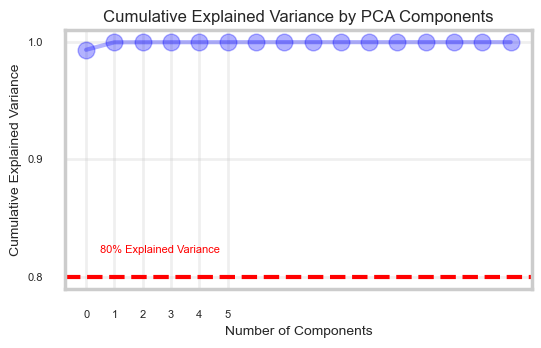

Number of components explaining at least 80% variance: 1


In [63]:
#PCA
pca = PCA()  
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(6, 4))  

# Plot the cumulative explained variance
plt.plot(cumulative_explained_variance, marker='o', color='b', alpha =0.3)

# Add labels and title with smaller fonts
plt.title('Cumulative Explained Variance by PCA Components', fontsize=12)
plt.xlabel('Number of Components', fontsize=10)
plt.ylabel('Cumulative Explained Variance', fontsize=10)

# Make the numerals on the axis smaller
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Add ticks between 0 and 5 for x-axis
plt.xticks(np.arange(0, 6, 1))

# Add a horizontal line for 80% threshold
plt.axhline(y=0.80, color='r', linestyle='--')
plt.text(0.5, 0.82, '80% Explained Variance', color='red', fontsize=8)

plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

# Find the number of components that explain at least 80% of the variance
n_components_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f'Number of components explaining at least 80% variance: {n_components_80}')

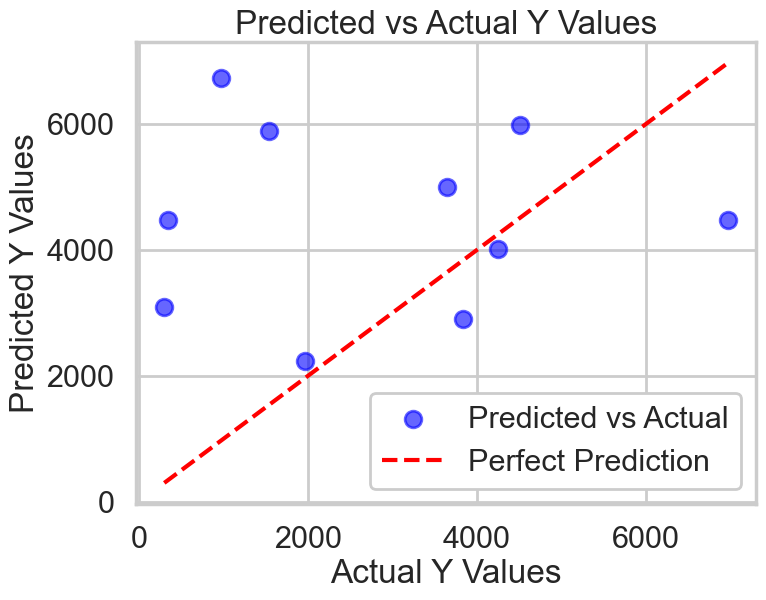

In [65]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a diagonal line representing a perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Y Values')
plt.ylabel('Predicted Y Values')
plt.title('Predicted vs Actual Y Values')

# Add legend
plt.legend(loc='best', facecolor='white', framealpha=1)

# Show the plot
plt.show()

It looks okay to use a linear model, but this is time-series data, so I will check for lags and see whether it is better to use a time-series function to model the data.

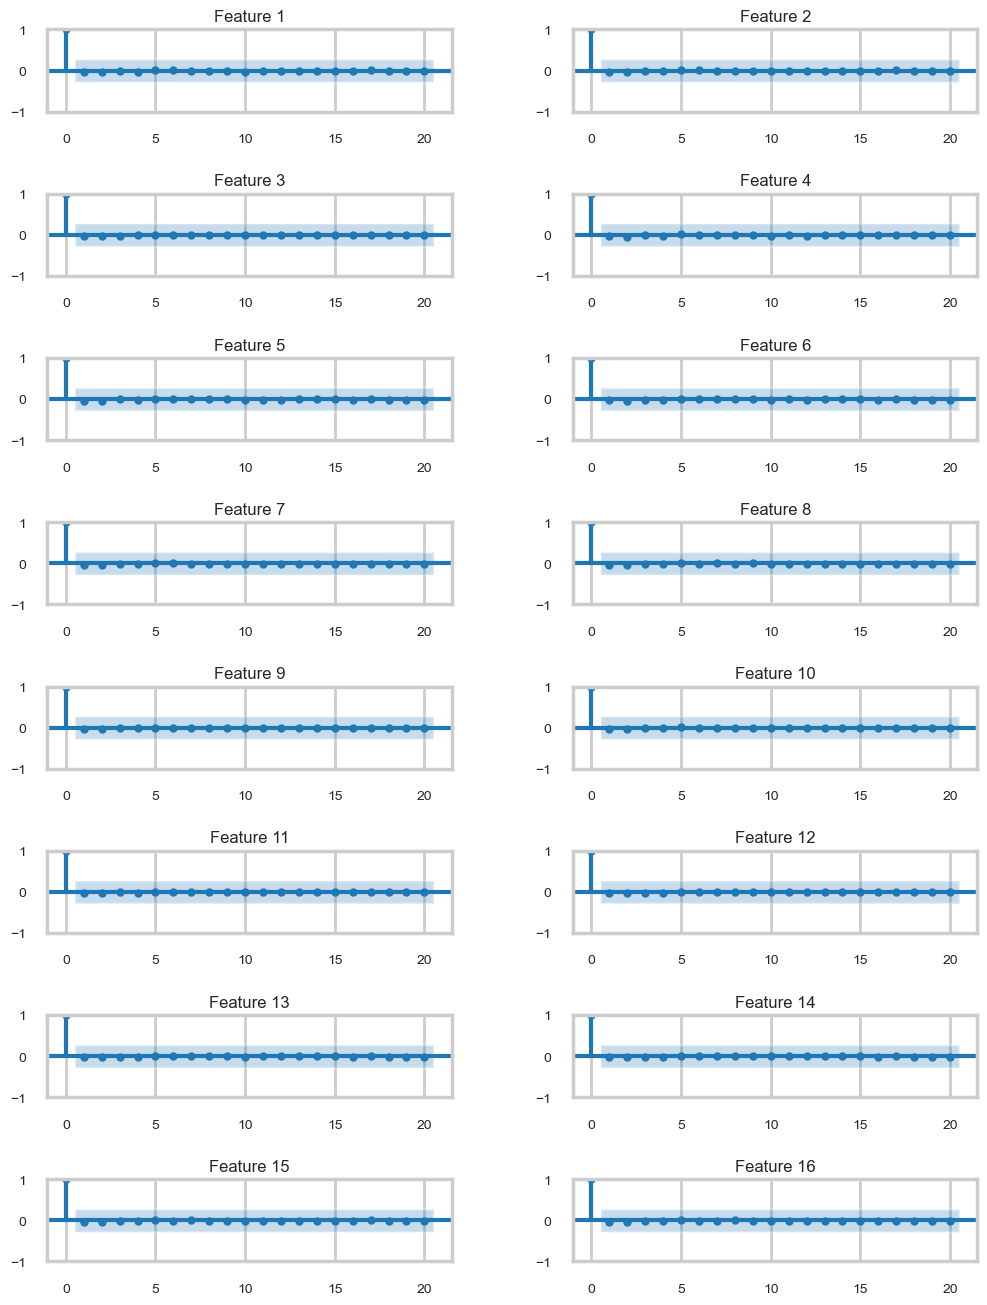

In [68]:
#Plotting the auto-correlation functions for each year.

# Define number of features and the layout (8 rows, 2 columns)
num_features = X_scaled.shape[1]
rows = 8
cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 16))  

# Plot the ACF for each feature
for i in range(num_features):
    row = i // cols  
    col = i % cols   
    ax = axes[row, col]
    plot_acf(X_scaled[:, i], lags=20, alpha=0.05, ax=ax)
    ax.set_title(f'Feature {i+1}', fontsize=12)
    
    # Set x and y axis label font size to match the title
    ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust spacing between subplots (increase wspace and hspace)
plt.subplots_adjust(hspace=1, wspace=0.3)

# Show the plot with improved spacing and label sizes
plt.show()


ADF Statistic: -7.168337364030032
p-value: 2.84742280796459e-10


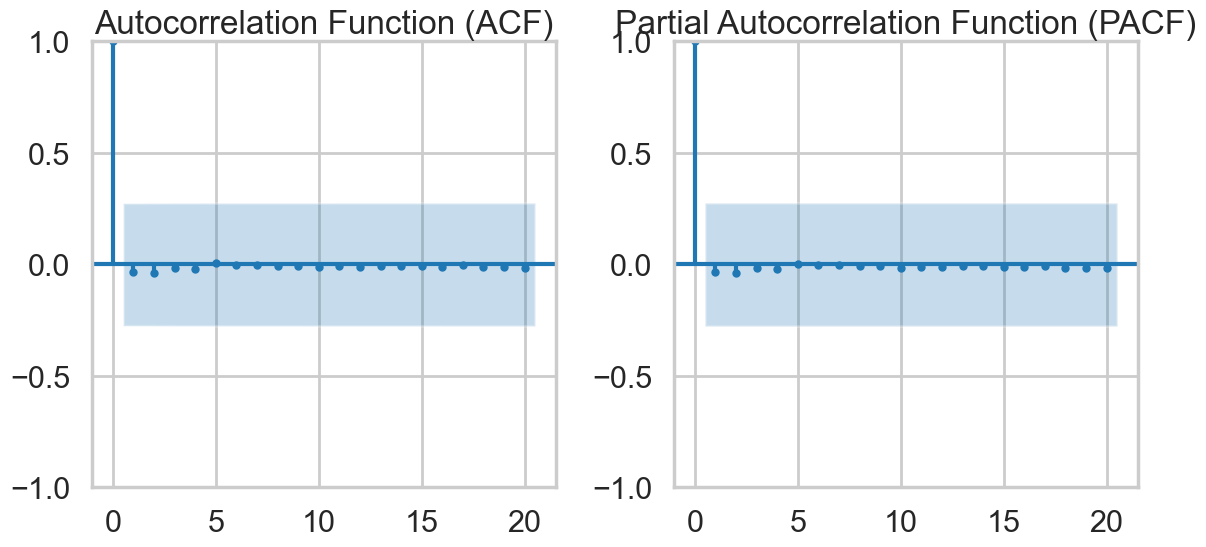

In [83]:
#It looks like there might be the slightest amount of auto-correlation in year three, let's see if it is there in the 
#PCA components.

# Perform PCA to reduce to one component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled_df)

# Convert the PCA result to a DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=['Principal Component'])

# Now you can use the PCA result as your univariate series
X_train_univariate = X_pca_df['Principal Component']

# Perform the Augmented Dickey-Fuller test
result = adfuller(X_train_univariate)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# ACF and PACF plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(X_train_univariate, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(X_train_univariate, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In the AD Fuller statistic we can tell the data is stationary. It looks like the correct number of lags will be less than five.

In [73]:
#ARIMA Model 1

# Fit the ARIMA model with chosen parameters
mod = ARIMA(X_pca, order=(1, 0, 0))  
result = mod.fit()

# Specify prediction start and end indices
start = len(X_pca)
end = len(X_pca) + len(y_test) - 1

# Predict using the ARIMA model
y_pred = result.predict(start=start, end=end)

# Print summary of the ARIMA model
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -142.871
Date:                Fri, 14 Feb 2025   AIC                            291.742
Time:                        14:32:59   BIC                            297.538
Sample:                             0   HQIC                           293.957
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      4.724      0.000      1.000      -9.258       9.259
ar.L1         -0.0333      4.870     -0.007      0.995      -9.579       9.512
sigma2        15.8771      4.667      3.402      0.0

In [75]:
# Fit ARIMA model on additional lags
mod2 = ARIMA(X_train_univariate, order=(4, 0, 0))  
result2 = mod2.fit()

# Predict using the ARIMA model
y_pred2 = result2.predict()

# Print summary of the ARIMA model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -142.871
Date:                Fri, 14 Feb 2025   AIC                            291.742
Time:                        14:33:00   BIC                            297.538
Sample:                             0   HQIC                           293.957
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      4.724      0.000      1.000      -9.258       9.259
ar.L1         -0.0333      4.870     -0.007      0.995      -9.579       9.512
sigma2        15.8771      4.667      3.402      0.0

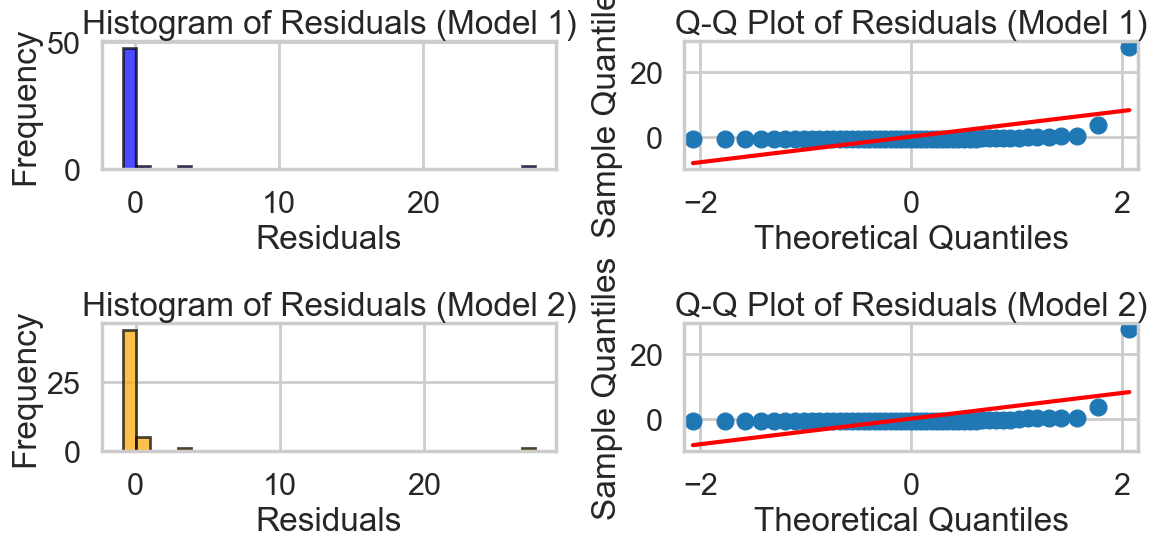

In [77]:
# Residuals from the fitted ARIMA models
residuals1 = result.resid  # Residuals from the first model
residuals2 = result2.resid  # Residuals from the second model

# Create a figure with subplots for histogram and Q-Q plot
plt.figure(figsize=(12, 6))

# Histogram for the first model
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
plt.hist(residuals1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Residuals (Model 1)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot for the first model
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sm.qqplot(residuals1, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Model 1)')

# Histogram for the second model
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
plt.hist(residuals2, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Histogram of Residuals (Model 2)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot for the second model
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sm.qqplot(residuals2, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Model 2)')

plt.tight_layout()
plt.show()


In [85]:
# Reset y's index (if y is a pandas Series)
y = y.reset_index(drop=True)

# Define a TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Placeholder for metrics
arima_mse_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Select a univariate series from X_train for ARIMA
    y_train_univariate = X_train[:, 0]  
    y_test_univariate = X_test[:, 0]  # Corresponding test set

    # Fit ARIMA model
    model_arima = ARIMA(y_train_univariate, order=(1, 0, 0))  
    result = model_arima.fit()

    # Make predictions
    y_pred = result.predict(start=len(y_train_univariate),
                            end=len(y_train_univariate) + len(y_test_univariate) - 1)

    # Calculate and store MSE
    mse = mean_squared_error(y_test_univariate, y_pred)
    arima_mse_scores.append(mse)

print("ARIMA MSE Scores:", arima_mse_scores)
print("Average MSE:", np.mean(arima_mse_scores))


ARIMA MSE Scores: [0.4920852804015535, 0.16591506808298923, 0.10058916388114512, 0.585171870603099, 0.04961969883671817]
Average MSE: 0.278676216361101


In [87]:
# Define a TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Placeholder for metrics
arima_mse_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Select a univariate series from X_train for ARIMA
    y_train_univariate = X_train[:, 0]  
    y_test_univariate = X_test[:, 0]  # Corresponding test set

    # Fit ARIMA model
    model = ARIMA(y_train_univariate, order=(4, 0, 0))  
    result = model.fit()

    # Make predictions
    y_pred = result.predict(start=len(y_train_univariate), end=len(y_train_univariate) + len(y_test_univariate) - 1)

    # Calculate and store MSE
    mse = mean_squared_error(y_test_univariate, y_pred)
    arima_mse_scores.append(mse)

print("ARIMA2 MSE Scores:", arima_mse_scores)
print("Average MSE:", np.mean(arima_mse_scores))


ARIMA2 MSE Scores: [1.0379242869687637, 0.21626883455424678, 0.11406775642131431, 0.5857232559016025, 0.05372395624812124]
Average MSE: 0.4015416180188097


In [91]:
#A VaR Model 

# Create a subset of the DataFrame with only numeric columns, excluding 'index' and the target year '2023'
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numeric columns
X_scaled = scaler.fit_transform(X_pca_df)


# TimeSeriesSplit with 4 splits
tscv = TimeSeriesSplit(n_splits=4)

for train_index, test_index in tscv.split(X_train_univariate):

    # Using .iloc to avoid KeyError and ensure indexing works correctly
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Ensure that X_train is a DataFrame 
X_train_df = pd.DataFrame(X_train)

# Fit the VAR model 
model_var = VAR(X_train_df)
results_var = model_var.fit(ic='aic')  

# View the summary of the model
print(results_var.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, Feb, 2025
Time:                     14:40:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.88408
Nobs:                     31.0000    HQIC:                  -10.1936
Log likelihood:           121.843    FPE:                3.57391e-05
AIC:                     -10.8269    Det(Omega_mle):     1.27017e-05
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -3.418903         2.434522           -1.404           0.160
L1.0         -3.194663         5.832772           -0.548           0.584
L1.1          1.914797         3.529339            0.543           0.587
L2.0         -4.929883 

In [93]:
# Placeholder for metrics
var_mse_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ensure X_train is a DataFrame
    X_train_df = pd.DataFrame(X_train)
    
    # Fit VAR model
    model_var = VAR(X_train_df)
    results_var = model_var.fit()

    # Forecasting
    y_pred = results_var.forecast(X_train_df.values[-results_var.k_ar:], steps=len(X_test))

    # Calculate and store MSE
    mse = mean_squared_error(y_test, y_pred[:, 0])  
    var_mse_scores.append(mse)

print("VAR MSE Scores:", var_mse_scores)
print("Average MSE:", np.mean(var_mse_scores))


VAR MSE Scores: [4410973.411479764, 3259848.2908477457, 235846166.20805717, 11478506.570504274]
Average MSE: 63748873.62022224


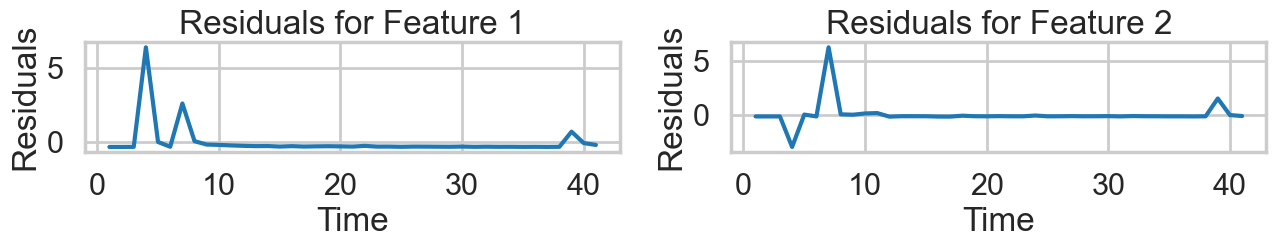

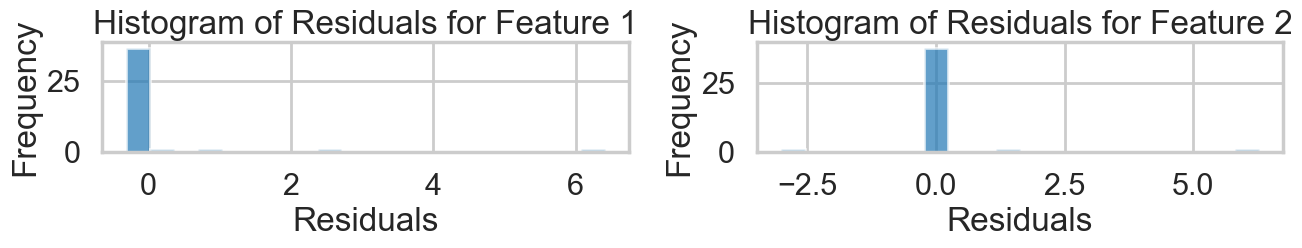

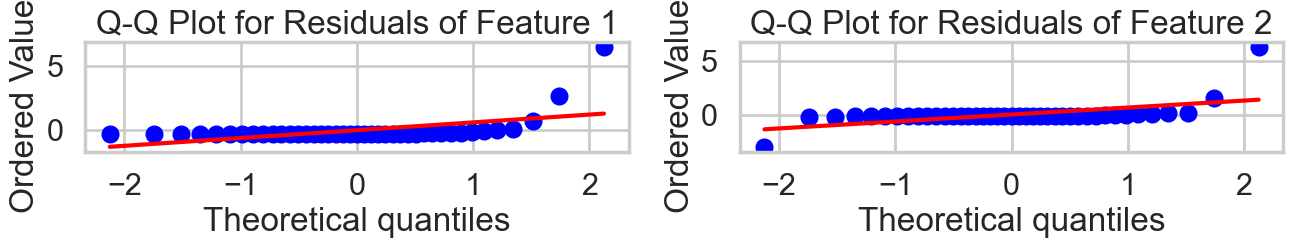

In [95]:
# Extract the residuals and ensure they are in DataFrame format
residuals = results_var.resid
residuals_df = pd.DataFrame(residuals, columns=X_train_df.columns)

# Plotting the residuals with more space
num_features = residuals_df.shape[1]
plt.figure(figsize=(20, 5 * num_features // 3))  # Adjust height based on number of features
for i in range(num_features):
    plt.subplot(num_features // 3 + 1, 3, i + 1)
    plt.plot(residuals_df.iloc[:, i])
    plt.title(f'Residuals for Feature {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase space between rows
plt.show()

# Optionally, plot the histogram of residuals
plt.figure(figsize=(20, 5 * num_features // 3))
for i in range(num_features):
    plt.subplot(num_features // 3 + 1, 3, i + 1)
    plt.hist(residuals_df.iloc[:, i], bins=20, alpha=0.7)
    plt.title(f'Histogram of Residuals for Feature {i+1}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase space between rows
plt.show()

# Optionally, create a Q-Q plot to check normality
plt.figure(figsize=(20, 5 * num_features // 3))
for i in range(num_features):
    plt.subplot(num_features // 3 + 1, 3, i + 1)
    stats.probplot(residuals_df.iloc[:, i], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Residuals of Feature {i+1}')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase space between rows
plt.show()

In these models it appears that the first two models (ARIMA1 and ARIMA2) have lower residuals, as it also appears in the MSE-scores. In the ARIMA models I chose to use PCA to reduce the number of variables in the model. In the VaR modelling this simplification is less necessary. While the MSE-score appears much higher for the VAR predictor the AIC and BIC scores are substantially lower for the VAR model. 

Linear regression (without PCA)
Mean Squared Error (MSE): 8809317.564591292
R-squared Score: -1.090373675217983


ARIMA 1:
ARIMA MSE Scores: [0.4920852804015535, 0.16591506808298923, 0.10058916388114512, 0.585171870603099, 0.04961969883671817]
Average MSE: 0.278676216361101

ARIMA 2:
ARIMA2 MSE Scores: [1.0379242869687637, 0.21626883455424678, 0.11406775642131431, 0.5857232559016025, 0.05372395624812124]
Average MSE: 0.4015416180188097

VAR :
VAR MSE Scores: [354806659460.1925, 3258731.234438983, 235845996.07972065, 11479199.778941542]
Average MSE: 88764310846.8214

ARIMA model 1:
AIC                            291.742
BIC                            297.538

ARIMA model 2:
AIC                            291.742
BIC                            297.538

VaR model:
AIC:                     -144.141    BIC:                   -132.773

It seems like the VaR model could be a better predictor for this data. 

In [98]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import pandas as pd

# Apply StandardScaler to the numeric columns
preX_scaled = scaler.fit_transform(preX)

# Convert the scaled array back into a DataFrame to retain column names and indices
preX_scaled_df = pd.DataFrame(preX_scaled, columns=X.columns, index=X.index)

# Placeholder for metrics
var_mse_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(preX_scaled):
    X_train, X_test = preX_scaled[train_index], preX_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ensure X_train is a DataFrame
    X_train_df = pd.DataFrame(X_train)

    # Fit VAR model
    model_var = VAR(X_train_df)
    results_var = model_var.fit()

    # Forecasting
    y_pred = results_var.forecast(X_train_df.values[-results_var.k_ar:], steps=len(X_test))

    # Calculate and store MSE (assuming homelessness in California is the first column)
    mse = mean_squared_error(y_test, y_pred[:, 7])  
    var_mse_scores.append(mse)

# After cross-validation, train the final model on the full dataset
final_var_model = VAR(preX_scaled)
final_var_results = final_var_model.fit()

# Forecast the value for 2023 (one step ahead)
forecast_steps = 1  # Predicting one step ahead (for 2023)
forecast_2023 = final_var_results.forecast(preX_scaled[-final_var_results.k_ar:], steps=forecast_steps)

# Assuming the "homelessness in California" is the first column
predicted_homelessness_2023 = forecast_2023[0, 7]  

# Print the predicted value for 2023
print(f"Predicted homelessness in California for 2023: {predicted_homelessness_2023}")

# Print MSE scores from cross-validation
print("VAR MSE Scores:", var_mse_scores)
print("Average MSE:", np.mean(var_mse_scores))


Predicted homelessness in California for 2023: -0.22667392024243643
VAR MSE Scores: [63378665480.25675, 3261736.6500149504, 235845833.0888102, 11479218.027624626]
Average MSE: 15907313067.005802


In [109]:
# Assume X_pca has shape (n_samples, 2)
year_2023_column_index = -1 
california_index = 7  

# Make a copy of X_pca
preX_pca = X_pca.copy()

# Assign the scalar predicted value directly in the PCA space
preX_pca[california_index, year_2023_column_index] = predicted_homelessness_2023

# Now, invert PCA to get back to the scaled original space, then use scaler.inverse_transform.
preX_original = pca.inverse_transform(preX_pca[california_index].reshape(1, -1))
X_california_rescaled = scaler.inverse_transform(preX_original)

predicted_homelessness_california_2023 = X_california_rescaled[0, year_2023_column_index]

print(f"Predicted homelessness in California for 2023 (original scale): {predicted_homelessness_california_2023}")


Predicted homelessness in California for 2023 (original scale): 185984.5175749896


Actual California homeless population in 2023 is 136531, so maybe the VaR model is not our best fit and we 

In [115]:
# Assuming you have already fit PCA with n_components=2 on X_scaled:
# X_pca = pca.fit_transform(X_scaled)
# and preX_scaled is the PCA-transformed data with shape (n_samples, 2)

# Let's say the relevant component for homelessness is component index 1 (for example)
california_pca_univariate = preX_scaled[7, 1]  # Extract the value from PCA space

# Fit ARIMA on this univariate time series (if you have time series data)
# For a single value this might not be meaningful – you need a time series. 
# Typically, you would have a series for each state over time.
# For demonstration, assume you have a time series for California in PCA space:
mod = ARIMA(preX_scaled[7, :], order=(1, 0, 0))
result = mod.fit()
y_pred = result.predict(start=len(preX_scaled[7]), end=len(preX_scaled[7]))  # Forecast one step

# Now update the PCA row with the predicted value on the appropriate component
preX_pca_updated = preX_scaled.copy()
preX_pca_updated[7, 1] = y_pred[-1]

# Now invert PCA to get back to the original scaled feature space
preX_original_updated = pca.inverse_transform(preX_pca_updated[7].reshape(1, -1))

# Then, use the scaler to get back to the original scale
X_california_rescaled = scaler.inverse_transform(preX_original_updated)
predicted_homelessness_california_2023 = X_california_rescaled[0, 7]  # if homelessness was originally at column 7

print(f"Predicted homelessness in California for 2023 (original scale): {predicted_homelessness_california_2023}")


Predicted homelessness in California for 2023 (original scale): 43055.04499805508


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In the ARIMA1 there is a much more accurate prediction of homelessness in California. It is the model best suited to predict results, despite the limited years of data collection. It adequately captures the exponential curve in the data.